<a href="https://colab.research.google.com/github/caiomocny/DecisionTreeBasedModels/blob/main/C%C3%B3digo_TCC_Caio_Mocny_Coutinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# Decision Tree Models

---
---

## Explicação do Método
<p align=justify>
&emsp; O método de árvore de decisão é um algoritmo de aprendizado de máquina que utiliza uma estrutura em forma de árvore para modelar relações entre variáveis ​​e prever um resultado alvo. Para construir a árvore, o algoritmo decide quais variáveis ​​são importantes para a previsão do resultado e em que ordem essas variáveis ​​devem ser usadas para dividir os dados em subconjuntos.

## Lógica do algoritmo
&emsp; O critério utilizado pelo método de árvore de decisão para selecionar as variáveis ​​de divisão é determinado pelo cálculo da impureza dos dados em cada nó da árvore. A impureza dos dados é medida utilizando-se um dos dois critérios principais:

*   Índice de Gini
*   Entropia



&emsp; Contudo, dado que com  o índice Gine é possível alcançar resultados similares de forma muito mais rápida por haver um menor custo computacional, não parece valer a pena o tempo investido em treinamento ao usar o critério de entropia.

&emsp; O índice de Gini, então, mede a probabilidade de classificar aleatoriamente uma amostra como pertencente a uma classe errada. Ele varia de 0 a 1, sendo 0 quando todas as amostras em um nó pertencem à mesma classe e 1 quando as amostras são igualmente distribuídas em todas as classes possíveis. O cálculo do índice de Gini é feito somando-se o quadrado das probabilidades de cada classe no nó e subtraindo esse valor de 1.

&emsp; Ou seja, Leafs que possuem exemplos nos quais não deveria possuir, são chamadas de Impuras, justamente por não serem 100% precisas na predição.


## Fonte

*   https://quantdare.com/decision-trees-gini-vs-entropy/#:~:text=Conclusions,entropy%20criterion%20are%20slightly%20better.
<p>



## Importando libs ao projeto





In [ ]:
## Importando libs ao projeto
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### Importando o database previamente ajustado:

* '.' como decimal
* Inserção de colunas copiadas mas com ordem de grandeza maiores (de dólar para bilhão de dólar) para não sobrecarregar o algoritimo com cálculos de números muito grande.

### Retirando as duas primeiras colunas que são o nome do país e seu valor no ECI que é representado em clases na terceira coluna "Classe"

In [ ]:
df = pd.read_excel('matriz_decisao_tratada_reduzida_v2.xlsx')
df = df.drop(df.columns[[0, 1]], axis =1)
print(df["Classe"].value_counts())


3    69
2    37
1    24
Name: Classe, dtype: int64


## PASSO 0: Tratamento do database importado


In [ ]:
df.describe()

,Classe,Overall score,"PIB (Bilhões, PPP)",1/Desemprego,Income Tax Rate (%) (Taxa de Imposto de Renda (%),1/Inflação,Crescimento do PIB per Capita (%),Reservas Totais (Bilhoes US$),Receitas (% do PIB)/Despesas (% do PIB),População Ativa (%)\n(15 - 65 anos),Despesas do Governo em Educação (% do PIB),Taxa de alfabetização,Valor agregado de fabricação de média e alta tecnologia (% do valor agregado de fabricação),Despesas em P&D (% do PIB),Exportacoes de Alta Tecno (Bilhoes US$),Importação de Bens e Serviços (% do PIB),Índice GINI,1/População que vive em favelas
count,130.000000,120.000000,130.000000,130.000000,130.000000,130.000000,130.000000,122.000000,105.000000,130.000000,126.000000,105.000000,121.000000,108.000000,123.000000,126.000000,106.000000,73.000000
mean,2.346154,63.285667,969.625968,0.184317,29.035897,0.648884,1.572031,98.978608,0.965745,64.104947,4.397268,92.579661,25.956265,0.889257,18.732221,43.125030,37.814475,0.087243
std,0.774712,9.783568,2891.521744,0.140889,11.047330,0.983430,2.198145,343.623324,0.149928,6.203836,1.595265,11.585766,16.596405,0.939582,70.614817,20.910742,7.994193,0.134822
min,1.000000,28.840000,14.540800,0.039349,0.000000,0.000005,-8.654201,0.367440,0.653171,49.614143,0.000009,48.552858,0.259529,0.010360,0.000398,13.131296,24.912500,0.012932
25%,2.000000,56.570000,78.511400,0.107218,22.700000,0.180308,0.635587,3.571525,0.892940,61.563390,3.343893,90.848089,13.164461,0.239500,0.029434,27.945360,32.006250,0.021142
50%,3.000000,63.110000,260.405000,0.157485,29.300000,0.362859,1.512493,15.478524,0.941450,65.029387,4.318481,98.571227,22.754385,0.532244,0.258818,38.794497,36.552083,0.040863
75%,3.000000,69.240000,746.931350,0.214177,35.950000,0.627058,2.760419,60.582118,1.013801,67.633138,5.390339,99.667806,39.378571,1.250792,6.053433,55.616384,42.340625,0.112591
max,3.000000,88.340000,24641.531200,1.177579,57.000000,7.849294,7.993238,3400.212355,1.675719,84.239639,9.475662,99.999942,78.377280,4.628915,706.336699,151.903033,63.000000,0.909091


KNN-Imputer para incluir valores com base em vizinhos mais próximos aos dados faltantes

In [ ]:
X = np.array(df.copy())
imputer = KNNImputer(n_neighbors=3)
X_transformed = imputer.fit_transform(X)
dft = pd.DataFrame(X_transformed, index=df.index, columns=df.columns)
dft.describe()


,Classe,Overall score,"PIB (Bilhões, PPP)",1/Desemprego,Income Tax Rate (%) (Taxa de Imposto de Renda (%),1/Inflação,Crescimento do PIB per Capita (%),Reservas Totais (Bilhoes US$),Receitas (% do PIB)/Despesas (% do PIB),População Ativa (%)\n(15 - 65 anos),Despesas do Governo em Educação (% do PIB),Taxa de alfabetização,Valor agregado de fabricação de média e alta tecnologia (% do valor agregado de fabricação),Despesas em P&D (% do PIB),Exportacoes de Alta Tecno (Bilhoes US$),Importação de Bens e Serviços (% do PIB),Índice GINI,1/População que vive em favelas
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,2.346154,62.957436,969.625968,0.184317,29.035897,0.648884,1.572031,93.655936,0.966881,64.104947,4.396445,92.749035,25.314149,0.797381,17.731110,43.070101,38.162942,0.100513
std,0.774712,9.542926,2891.521744,0.140889,11.047330,0.983430,2.198145,333.468640,0.140554,6.203836,1.587551,11.000430,16.235760,0.889787,68.801296,20.611441,7.593142,0.119221
min,1.000000,28.840000,14.540800,0.039349,0.000000,0.000005,-8.654201,0.367440,0.653171,49.614143,0.000009,48.552858,0.259529,0.010360,0.000398,13.131296,24.912500,0.012932
25%,2.000000,56.240000,78.511400,0.107218,22.700000,0.180308,0.635587,3.475406,0.896016,61.563390,3.343893,90.122124,12.748360,0.220275,0.029392,28.292925,32.712500,0.026307
50%,3.000000,62.280000,260.405000,0.157485,29.300000,0.362859,1.512493,14.991752,0.947491,65.029387,4.325980,98.348388,22.125457,0.450553,0.249383,39.230245,37.357083,0.062269
75%,3.000000,68.820000,746.931350,0.214177,35.950000,0.627058,2.760419,53.510624,1.014815,67.633138,5.390339,99.521241,37.418957,1.094802,5.315881,54.722668,41.729018,0.118310
max,3.000000,88.340000,24641.531200,1.177579,57.000000,7.849294,7.993238,3400.212355,1.675719,84.239639,9.475662,99.999942,78.377280,4.628915,706.336699,151.903033,63.000000,0.909091


In [ ]:

"""
# PASSO 0: Missing Data

dft = df.copy()

tam = len(dft.columns)
for c in range(0, tam):
  if dft[dft.columns[c]].isnull().values.any():
    print("coluna {} com dados faltantes".format(c)) #identificar quais colunas estão com dados faltantes

#Precisaria ainda excluir os outliers primeiro para não poluir a média, assim como foi feito para a última coluna...

    for l in range(0, dft[dft.columns[0]].count()):
      if math.isnan(dft.iat[l, c]): #verifica se o valor da linha l e coluna c é nula
        dft.iat[l, c] = dft[dft.columns[c]].mean()

dft.head()
"""

'\n# PASSO 0: Missing Data\n\ndft = df.copy()\n\ntam = len(dft.columns)\nfor c in range(0, tam):\n  if dft[dft.columns[c]].isnull().values.any():\n    print("coluna {} com dados faltantes".format(c)) #identificar quais colunas estão com dados faltantes\n\n#Precisaria ainda excluir os outliers primeiro para não poluir a média, assim como foi feito para a última coluna...\n\n    for l in range(0, dft[dft.columns[0]].count()):\n      if math.isnan(dft.iat[l, c]): #verifica se o valor da linha l e coluna c é nula\n        dft.iat[l, c] = dft[dft.columns[c]].mean()\n\ndft.head()\n'

## PASSO 1: Definir os dados que compõem os critérios (x) e os que compõem o que será previsto (y) de acordo com esses critérios

In [ ]:
dft_atributos = dft.drop(['Classe'], axis = 1).copy()


<AxesSubplot:>

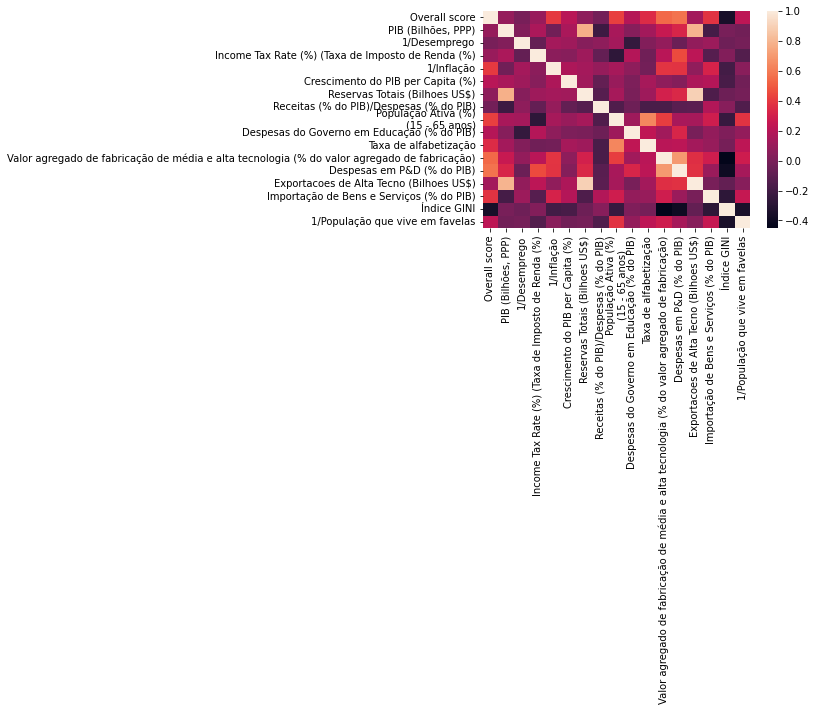

In [ ]:
# Isso aqui precisa ser feito com a base original, não aqui
import seaborn as sns
corr = dft_atributos.select_dtypes('number').corr()
sns.heatmap(corr)

## PASSO 2: Separar os dados em sets de treino e teste

In [ ]:
X = dft.drop(['Classe'], axis = 1).copy()
y = dft[dft.columns[0]].copy() ## Alternativamente df['Classe'].copy()

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

## PASSO 3: Criar a árvore, treiná-la e visualizá-la

## **Explicação da estrutura da Árvore**
<p align=justify>
&emsp; Para decidir qual variável utilizar como divisor em um nó da árvore, o algoritmo calcula a impureza dos dados antes e depois da divisão em potencial para cada variável. A variável que resulta na maior redução na impureza é escolhida como divisor. Essa redução é medida pela diferença entre a impureza total do nó antes da divisão e a *soma ponderada das impurezas dos nós filhos resultantes da divisão.*

&emsp; Vale ressaltar a função <code>DecisionTreeRegressor()</code> possui um parâmetro de grande importância que é o <code>min_samples_leaf</code>. Este determina qual o menor número de amostras que devem estar contidas em um nó para que este não se ramifique e vire uma folha. No exemplo acima, caso a qntd de amostras no nó seja <= 5 amostras, não irá mais se dividir e a classe de maior predominância representará o valor/ output das amostras que estão presentes na devida folha.

&emsp; Obs.: Deve-se tomar cuidado ao minimizar o min_samples_leaf para não acarretar em <i>overtfiting</i> pelo dataset de treinamento
<p>

Informações que comprêm o gráfico acima representam:

*   Divisor: Variável com seu respectivo delimitador de valor a qual gera uma maior redução na impureza
*   Gini: Impureza gerada no nó
*   Samples: qntd de amostras do dataset que correspondem às divisões até o devido nó/ folha
*   Value: distribuição das amostras no nó entre as classes existentes
*   Class: Classe com maior predominância no Value

# PASSO 5: GridSearch na árvore de classificação

In [ ]:
param_grid_tree = {
    'min_samples_leaf': [i for i in range(1, 20)],
    'max_depth': [None, 2, 4, 6],
}

# Treino as florestas no conjunto de treinamento com as diferentes configurações de hiperparâmetros
tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [ ]:
# Tabelando os hiperparâmetros
train_df_tree = pd.DataFrame(grid_search.cv_results_)
train_df_tree.sort_values("mean_test_score", ascending=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
38,0.003124,0.006248,0.003130,0.006259,4,1,"{'max_depth': 4, 'min_samples_leaf': 1}",0.894737,0.777778,0.833333,0.555556,0.722222,0.756725,0.115775,1
57,0.001843,0.001555,0.006680,0.011398,6,1,"{'max_depth': 6, 'min_samples_leaf': 1}",0.894737,0.777778,0.777778,0.555556,0.722222,0.745614,0.110432,2
0,0.004081,0.001265,0.001736,0.000817,None,1,"{'max_depth': None, 'min_samples_leaf': 1}",0.894737,0.777778,0.777778,0.555556,0.722222,0.745614,0.110432,2
9,0.000000,0.000000,0.000000,0.000000,None,10,"{'max_depth': None, 'min_samples_leaf': 10}",0.842105,0.833333,0.722222,0.611111,0.666667,0.735088,0.090909,4
47,0.003124,0.006249,0.000000,0.000000,4,10,"{'max_depth': 4, 'min_samples_leaf': 10}",0.842105,0.833333,0.722222,0.611111,0.666667,0.735088,0.090909,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,0.000000,0.000000,0.003124,0.006248,2,15,"{'max_depth': 2, 'min_samples_leaf': 15}",0.684211,0.611111,0.611111,0.611111,0.666667,0.636842,0.031999,70
21,0.000000,0.000000,0.003125,0.006249,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.684211,0.611111,0.722222,0.500000,0.666667,0.636842,0.077215,70
22,0.004365,0.005837,0.000448,0.000554,2,4,"{'max_depth': 2, 'min_samples_leaf': 4}",0.684211,0.611111,0.722222,0.500000,0.666667,0.636842,0.077215,70
34,0.001990,0.001666,0.001186,0.000947,2,16,"{'max_depth': 2, 'min_samples_leaf': 16}",0.684211,0.611111,0.611111,0.611111,0.666667,0.636842,0.031999,70


In [ ]:
# Gerar a melhor combinação de hiperparâmetros
best_params_tree = grid_search.best_params_
best_params_tree

{'max_depth': 4, 'min_samples_leaf': 1}

In [ ]:
# Usa essa informação para recriar a floresta e usá-la nos dados de teste
best_tree = DecisionTreeClassifier(**best_params_tree, random_state=42)
best_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Verificar a maior acurácia gerada para os dados de treinamento
a = train_df_tree['mean_test_score'].max()
print(f"Acurácia no conjunto de treino: {a}")

Acurácia no conjunto de treino: 0.7567251461988305


In [ ]:
# Verificar a acurácia para os dados de teste
y_test_pred_arvore = best_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred_arvore)
print(f"Acurácia no conjunto de teste: {test_accuracy}")

Acurácia no conjunto de teste: 0.7435897435897436


## PASSO 6: Plotando a árvore

[Text(1472.5, 587.0880000000001, 'Valor agregado de fabricação de média e alta tecnologia (% do valor agregado de fabricação) <= 39.121\ngini = 0.605\nsamples = 91\nvalue = [17, 26, 48]\nclass = Classe 3'),
 Text(775.0, 456.624, '1/População que vive em favelas <= 0.06\ngini = 0.434\nsamples = 69\nvalue = [0, 22, 47]\nclass = Classe 3'),
 Text(310.0, 326.1600000000001, '1/Inflação <= 0.492\ngini = 0.145\nsamples = 38\nvalue = [0, 3, 35]\nclass = Classe 3'),
 Text(155.0, 195.69600000000003, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]\nclass = Classe 3'),
 Text(465.0, 195.69600000000003, 'Exportacoes de Alta Tecno (Bilhoes US$) <= 0.237\ngini = 0.469\nsamples = 8\nvalue = [0, 3, 5]\nclass = Classe 3'),
 Text(310.0, 65.23200000000008, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = Classe 3'),
 Text(620.0, 65.23200000000008, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = Classe 2'),
 Text(1240.0, 326.1600000000001, 'Importação de Bens e Serviços (% do PIB) <= 48.729\ngini = 0

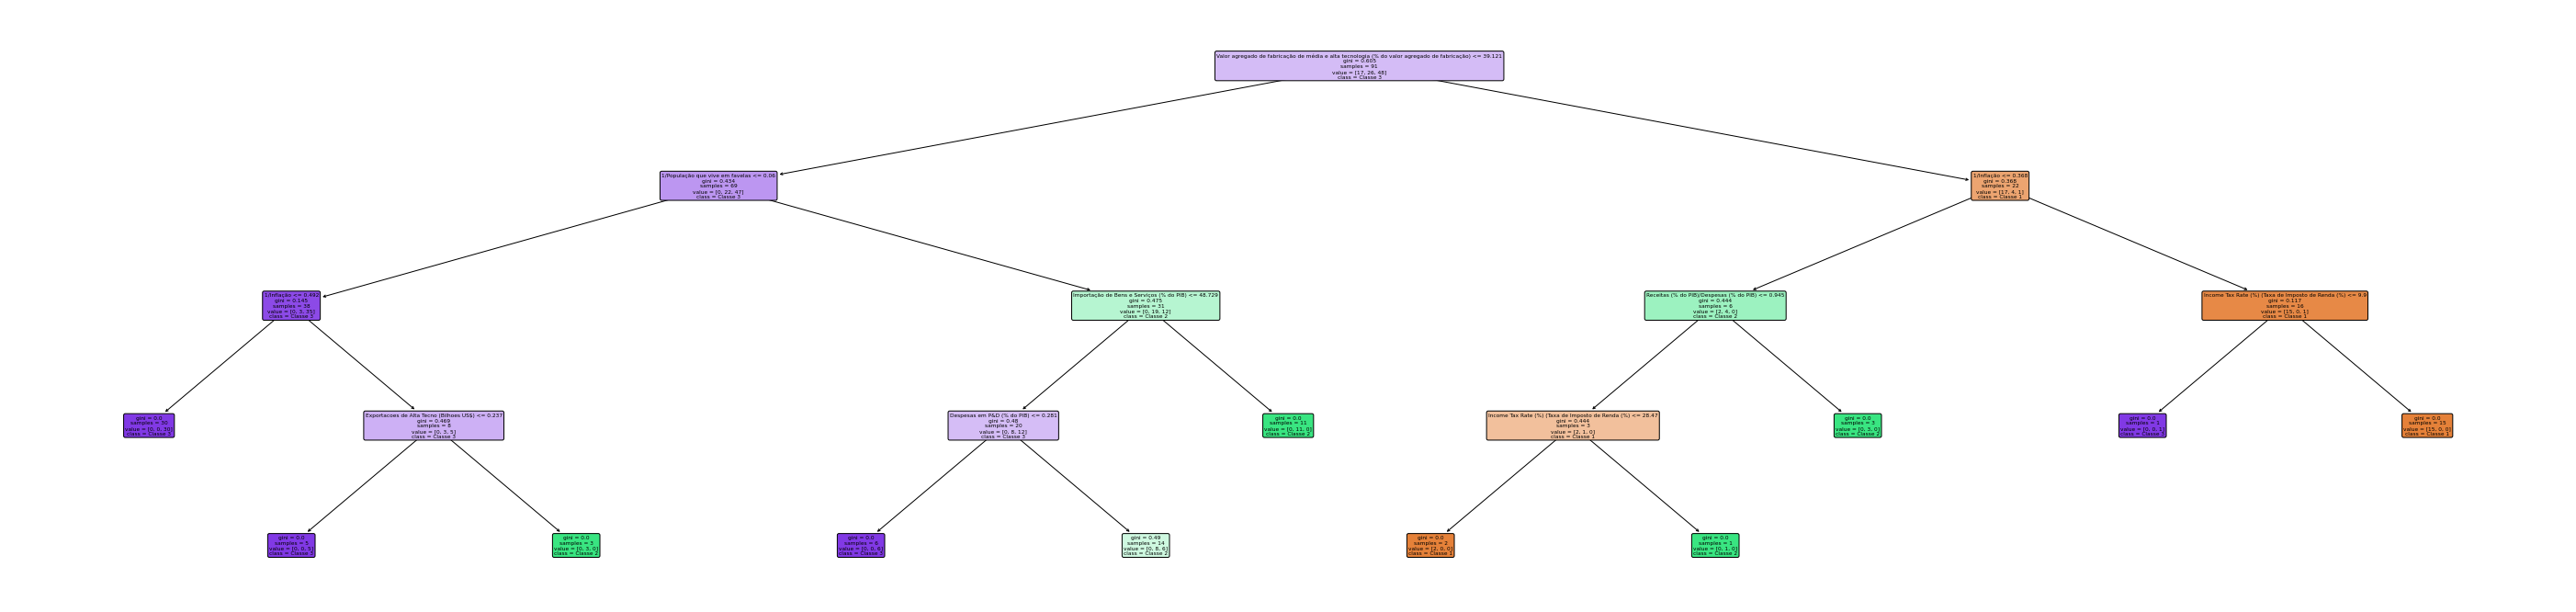

In [ ]:
plt.figure(figsize=(50, 12))
plot_tree(best_tree,
          filled=True,
          rounded=True,
          feature_names=X_train.columns,
          class_names=['Classe 1', 'Classe 2', 'Classe 3'])

### Matriz de confusão - Árvore de Classificação

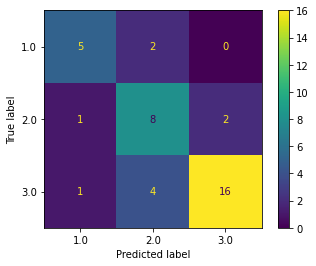

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_arvore, labels=best_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree.classes_)
disp.plot()
plt.show()

---
---
# Random Forest Classifier aplicada ao projeto
---
---

## Explicação do Método
<p align=justify>

&emsp; Segundo The Elements of Statistical Learning, também conhecido como a Bíblia do Machine Learning, as árvores de decisão sozinhas “tem um aspecto que as impede de ser a ferramenta ideal para a aprendizagem preditiva, ou seja, a imprecisão. Eles raramente fornecem precisão preditiva comparável ao melhor que pode ser alcançado com os dados disponíveis”. Ou seja, eles performam bem com os dados utilizados para a construção deles, porém não são flexíveis quando se trata de classificar novas amostras.
</p>

## Lógica do Algoritmo
<p align=justify>
&emsp; Como o seu próprio nome sugere, a Floresta Randômica é criada a partir da seleção aleatória de amostras a partir da base de dados de referência. Essa seleção, feita com reposição, é chamada de Bootstrap e a base de dados que foi criada por meio deste método é chamado de Bootstapped Dataset. O objetivo é gerar um “ruído positivo” na construção do bootstrapped dataset para, assim, explorar melhor as diferentes  possibilidades/ espaços que o dataset original pode nos oferecer.

&emsp; Ou seja, o **método bootstrap reduz a correlação entre as árvores** de decisão. Em uma árvore de decisão, pequenas alterações nos dados de treinamento podem resultar em uma estrutura de árvore significativamente diferente. O método bootstrap aproveita isso para produzir árvores não correlacionadas

&emsp; Em seguida, a Árvore de Decisão é criada por meio da seleção aleatória das variáveis (colunas) do conjunto de dados. Para cada variável selecionada aleatoriamente, é criado um nó na Árvore, o que difere do que ocorria quando era treinado uma única Árvore de decisão, pois os nós eram criados a partir da seleção das variáveis que possuíam menor impureza. E a partir da iteração da seleção aleatória das amostras e das variáveis, é criado as várias Árvores que compõem a Floresta.

&emsp; Como a seleção das amostras é feita com reposição, existe a chance de duplicatas serem inseridas no Bootstrapped Dataset. Em decorrência disso, cerca de 1/3 do dataset original não entra para o bootstrapped dataset. Essas amostras são utilizadas para estimar a precisão da Floresta Randômica, visto que não fizeram parte para a construção da mesma. Esse conjinto de amostras são também conhecidas como “Out-of-Bag Dataset” (OOB).

&emsp; A Floresta Randômica prevê o resultado para novas amostras por meio do resultado encontrado pela maioria das Árvores, no caso de ser uma Floresta de classificação, ou pela média dos resultados encontrados pelas Árvores, se for uma Floresta de regressão.

<p align=justify>

---
---
# Aplicação do param_grid - Floresta Randômica

---
---

In [ ]:
X = dft.drop(['Classe'], axis = 1).copy()
y = dft[dft.columns[0]].copy() ## Alternativamente df['Classe'].copy()

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [ ]:

param_grid = {
    'n_estimators': [i for i in range(10,101, 10)],
    'max_depth': [None, 2, 4, 6],
    'min_samples_leaf': [i for i in range(1, 10)],
}


In [ ]:
# Treino as florestas no conjunto de treinamento com as diferentes configurações de hiperparâmetros
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy')

In [ ]:
# Tabelando os hiperparâmetros
train_df = pd.DataFrame(grid_search.cv_results_)
train_df.sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
359,0.096768,0.008746,0.011145,0.006132,6,9,100,"{'max_depth': 6, 'min_samples_leaf': 9, 'n_est...",0.842105,0.888889,0.944444,0.777778,0.833333,0.857310,0.056073,1
267,0.084211,0.001177,0.006386,0.003255,4,9,80,"{'max_depth': 4, 'min_samples_leaf': 9, 'n_est...",0.842105,0.888889,0.944444,0.777778,0.833333,0.857310,0.056073,1
357,0.077555,0.008714,0.006539,0.007443,6,9,80,"{'max_depth': 6, 'min_samples_leaf': 9, 'n_est...",0.842105,0.888889,0.944444,0.777778,0.833333,0.857310,0.056073,1
87,0.080836,0.006344,0.009373,0.007653,None,9,80,"{'max_depth': None, 'min_samples_leaf': 9, 'n_...",0.842105,0.888889,0.944444,0.777778,0.833333,0.857310,0.056073,1
89,0.100757,0.005455,0.005315,0.006675,None,9,100,"{'max_depth': None, 'min_samples_leaf': 9, 'n_...",0.842105,0.888889,0.944444,0.777778,0.833333,0.857310,0.056073,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.023339,0.008148,0.000000,0.000000,4,1,20,"{'max_depth': 4, 'min_samples_leaf': 1, 'n_est...",0.842105,0.833333,0.888889,0.444444,0.666667,0.735088,0.163655,356
16,0.085532,0.003891,0.002353,0.004495,None,2,70,"{'max_depth': None, 'min_samples_leaf': 2, 'n_...",0.842105,0.833333,0.833333,0.388889,0.777778,0.735088,0.174604,356
18,0.102255,0.009804,0.006247,0.007651,None,2,90,"{'max_depth': None, 'min_samples_leaf': 2, 'n_...",0.842105,0.833333,0.833333,0.388889,0.777778,0.735088,0.174604,356
280,0.006249,0.007653,0.003129,0.006259,6,2,10,"{'max_depth': 6, 'min_samples_leaf': 2, 'n_est...",0.842105,0.833333,0.666667,0.500000,0.722222,0.712865,0.125498,359


In [ ]:
# Gerar a melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
best_params

{'max_depth': None, 'min_samples_leaf': 9, 'n_estimators': 80}

In [ ]:
# Verificar a maior acurácia gerada para os dados de treinamento
a = train_df['mean_test_score'].max()
print(f"Acurácia no conjunto de treino: {a}")

Acurácia no conjunto de treino: 0.8573099415204677


In [ ]:
# Usa essa informação para recriar a floresta e usá-la nos dados de teste
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Verificar a acurácia para os dados de teste
y_test_pred_floresta = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred_floresta)
print(f"Acurácia no conjunto de teste: {test_accuracy}")

Acurácia no conjunto de teste: 0.8205128205128205


### Matriz de confusão - Floresta Randômica

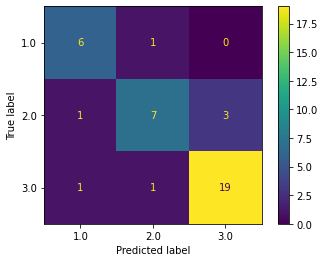

In [ ]:
cm_floresta = confusion_matrix(y_test, y_test_pred_floresta, labels=best_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_floresta, display_labels=best_rf.classes_)
disp.plot()
plt.show()

---
---
# Extra Trees
---
---

---
---
# Aplicação do param_grid - Extra Trees

---
---

In [ ]:
X = dft.drop(['Classe'], axis = 1).copy()
y = dft[dft.columns[0]].copy() ## Alternativamente df['Classe'].copy()

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [ ]:
param_grid = {
    'n_estimators': [i for i in range(10,101, 10)],
    'max_depth': [None, 2, 4, 6],
    'min_samples_leaf': [i for i in range(1, 10)],
}


In [ ]:
# Treino as florestas no conjunto de treinamento com as diferentes configurações de hiperparâmetros
extra_trees = ExtraTreesClassifier(random_state=42)
grid_search = GridSearchCV(extra_trees, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy')

In [ ]:
# Tabelando os hiperparâmetros
train_df = pd.DataFrame(grid_search.cv_results_)
train_df.sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
302,0.024335,0.000478,0.003790,0.000731,6,4,30,"{'max_depth': 6, 'min_samples_leaf': 4, 'n_est...",0.789474,0.888889,0.944444,0.666667,0.777778,0.813450,0.096170,1
304,0.039827,0.001058,0.005188,0.000321,6,4,50,"{'max_depth': 6, 'min_samples_leaf': 4, 'n_est...",0.789474,0.888889,0.944444,0.666667,0.777778,0.813450,0.096170,1
7,0.060396,0.004177,0.009379,0.007658,None,1,80,"{'max_depth': None, 'min_samples_leaf': 1, 'n_...",0.842105,0.888889,0.888889,0.611111,0.833333,0.812865,0.103477,3
8,0.062485,0.000019,0.015621,0.000019,None,1,90,"{'max_depth': None, 'min_samples_leaf': 1, 'n_...",0.842105,0.888889,0.888889,0.611111,0.833333,0.812865,0.103477,3
24,0.040609,0.007648,0.003124,0.006249,None,3,50,"{'max_depth': None, 'min_samples_leaf': 3, 'n_...",0.789474,0.833333,0.944444,0.611111,0.833333,0.802339,0.108489,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.033807,0.000638,0.016142,0.000632,2,8,60,"{'max_depth': 2, 'min_samples_leaf': 8, 'n_est...",0.526316,0.666667,0.666667,0.555556,0.500000,0.583041,0.070506,348
88,0.067892,0.000585,0.008186,0.000243,None,9,90,"{'max_depth': None, 'min_samples_leaf': 9, 'n_...",0.526316,0.611111,0.722222,0.555556,0.500000,0.583041,0.078776,348
268,0.073641,0.003827,0.009568,0.002224,4,9,90,"{'max_depth': 4, 'min_samples_leaf': 9, 'n_est...",0.526316,0.611111,0.722222,0.555556,0.500000,0.583041,0.078776,348
178,0.078835,0.006898,0.009268,0.007648,2,9,90,"{'max_depth': 2, 'min_samples_leaf': 9, 'n_est...",0.526316,0.611111,0.722222,0.500000,0.500000,0.571930,0.085500,359


In [ ]:
# Gerar a melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
best_params

{'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 30}

In [ ]:
# Verificar a maior acurácia gerada para os dados de treinamento
a = train_df['mean_test_score'].max()
print(f"Acurácia no conjunto de treino: {a}")

Acurácia no conjunto de treino: 0.8134502923976609


In [ ]:
# Usa essa informação para recriar a floresta e usá-la nos dados de teste
best_extra_trees = ExtraTreesClassifier(**best_params, random_state=42)
best_extra_trees.fit(X_train, y_train)

# Verificar a acurácia para os dados de teste
y_test_pred_extra = best_extra_trees.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred_extra)
print(f"Acurácia no conjunto de teste: {test_accuracy}")

Acurácia no conjunto de teste: 0.8205128205128205


### Matriz de confusão - Extra Trees

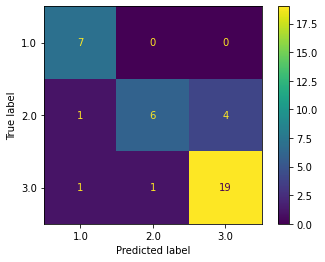

In [ ]:
cm_extra = confusion_matrix(y_test, y_test_pred_extra, labels=best_extra_trees.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_extra, display_labels=best_extra_trees.classes_)
disp.plot()
plt.show()

### Analisando as classificações dos países do conjunto de teste pelos diferentes modelos

In [ ]:
resultados = pd.DataFrame({"Rótulo": y_test,
               "Previsão - Árvore de Classificação": y_test_pred_arvore,
               "Previsão - Floresta Randômica":y_test_pred_floresta,
               "Previsão - Extra Trees": y_test_pred_extra})

countries = pd.read_excel('matriz_decisao_tratada_reduzida_v2.xlsx')['Alternativas']
countries_test = countries.filter(items = resultados.index)

resultados.index = countries_test
resultados

,Rótulo,Previsão - Árvore de Classificação,Previsão - Floresta Randômica,Previsão - Extra Trees
Alternativas,,,,
"Iran, Islamic Rep.",3.0,2.0,3.0,3.0
Honduras,3.0,3.0,3.0,3.0
Togo,3.0,3.0,3.0,3.0
Uzbekistan,3.0,3.0,3.0,3.0
"Yemen, Rep.",3.0,3.0,3.0,3.0
Vietnam,2.0,2.0,2.0,2.0
France,1.0,1.0,1.0,1.0
Turkey,2.0,2.0,2.0,3.0
Russian Federation,2.0,2.0,2.0,2.0
